# Questions

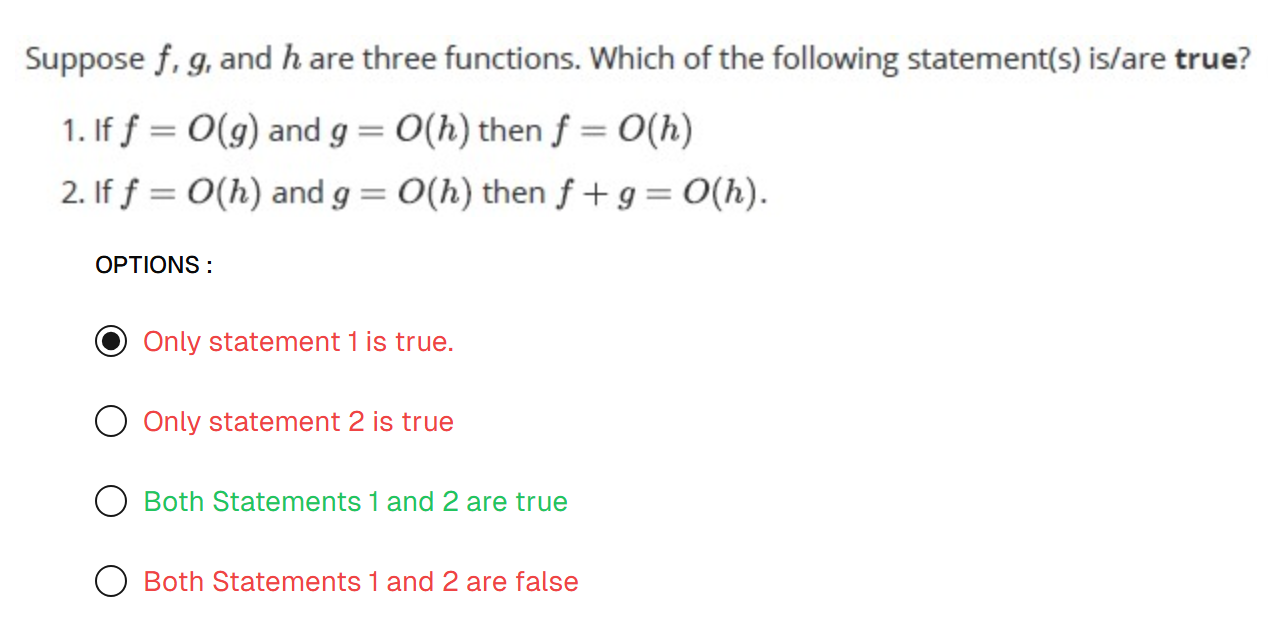


### **Statement 1**:

> If $f = O(g)$ and $g = O(h)$, then $f = O(h)$

This is testing **transitivity** of Big-O.

---

#### Step-by-step reasoning:

1. $f = O(g)$ means:
   There exist constants $c_1$ and $n_1$ such that

   $$
   f(n) \leq c_1 \cdot g(n) \quad \text{for all } n \geq n_1
   $$

2. $g = O(h)$ means:
   There exist constants $c_2$ and $n_2$ such that

   $$
   g(n) \leq c_2 \cdot h(n) \quad \text{for all } n \geq n_2
   $$

3. So for $n \geq \max(n_1, n_2)$,

   $$
   f(n) \leq c_1 \cdot g(n) \leq c_1 \cdot (c_2 \cdot h(n)) = (c_1 c_2) \cdot h(n)
   $$

✅ **Therefore:**

$$
f(n) \leq c \cdot h(n) \Rightarrow f = O(h)
$$

✔️ **Statement 1 is TRUE.**

---

### **Statement 2**:

> If $f = O(h)$ and $g = O(h)$, then $f + g = O(h)$

This is testing **additivity under same bound**.

---

#### Step-by-step reasoning:

1. $f = O(h) \Rightarrow f(n) \leq c_1 \cdot h(n)$ for all $n \geq n_1$
2. $g = O(h) \Rightarrow g(n) \leq c_2 \cdot h(n)$ for all $n \geq n_2$

Let $n_0 = \max(n_1, n_2)$

Then for all $n \geq n_0$:

$$
f(n) + g(n) \leq c_1 \cdot h(n) + c_2 \cdot h(n) = (c_1 + c_2) \cdot h(n)
$$

✅ **Therefore:**

$$
f + g = O(h)
$$

✔️ **Statement 2 is also TRUE.**
----------

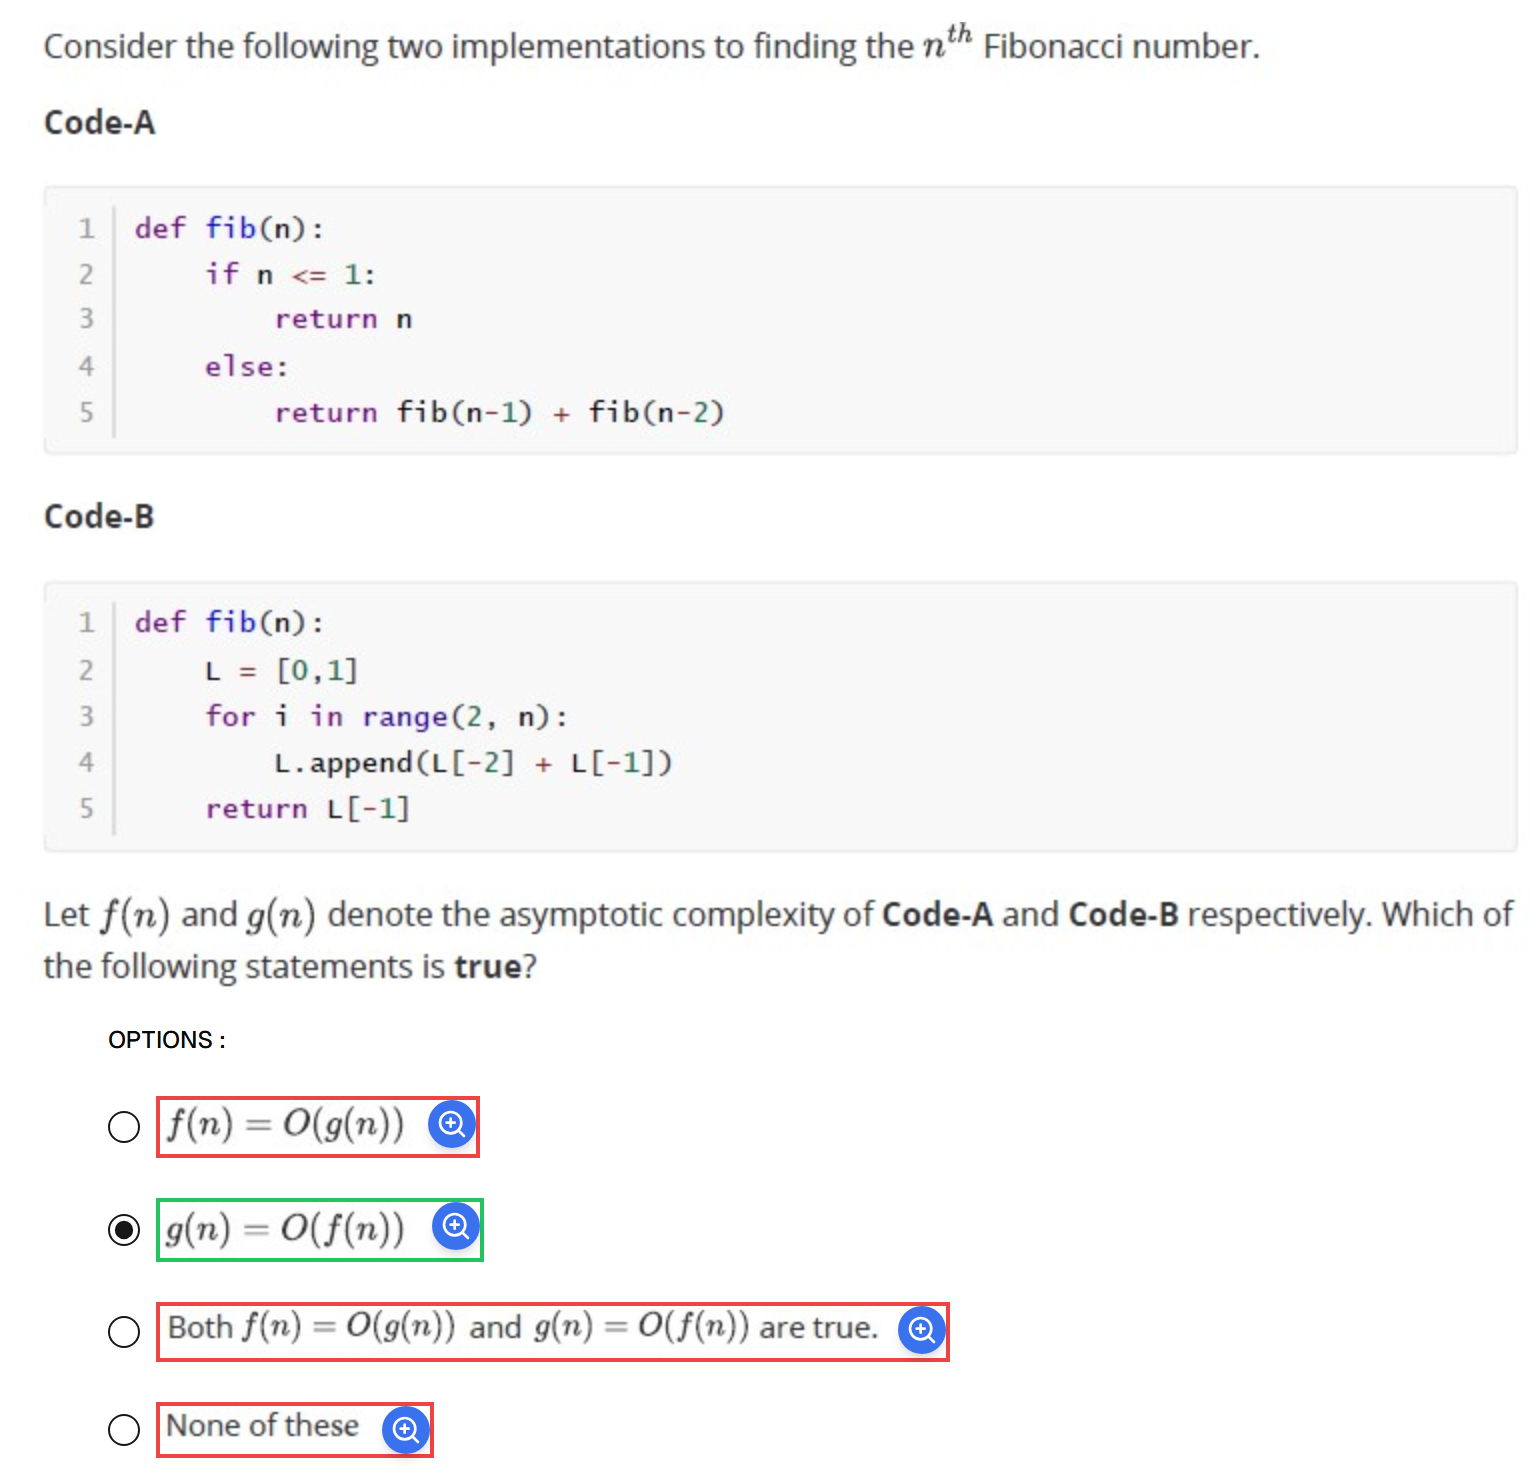

## 🔢 Code-A: Recursive Fibonacci

```python
def fib(n):
    if n <= 1:
        return n
    else:
        return fib(n-1) + fib(n-2)
```

### ⏱ Time Complexity:

* This is a **naive recursive** implementation.
* Each call to `fib(n)` results in **two more calls**, so it forms a binary tree of calls.
* The number of calls grows **exponentially**.

🔺 **Time Complexity: $f(n) = O(2^n)$**
This is **very inefficient** for large `n`.

---

## 🧮 Code-B: Iterative Fibonacci using list

```python
def fib(n):
    L = [0, 1]
    for i in range(2, n):
        L.append(L[-2] + L[-1])
    return L[-1]
```

### ⏱ Time Complexity:

* This uses a **bottom-up DP-like** approach.
* The loop runs **$n-2$** times, and each operation inside is constant time.

✅ **Time Complexity: $g(n) = O(n)$**

---

## Now Compare the Two

Let:

* $f(n) = \text{time complexity of Code-A} = O(2^n)$
* $g(n) = \text{time complexity of Code-B} = O(n)$

---

### ✅ Statement Analysis:

1. **$f(n) = O(g(n))$**
   ⛔ This would mean that $2^n = O(n)$, which is **false**.
   Exponential is **not bounded** by linear.

2. **$g(n) = O(f(n))$**
   ✅ This means $n = O(2^n)$, which is **true**, since linear is bounded by exponential growth.

3. **Both** statements true? ❌ No — only the second one is.


# DFS Edge Ordering

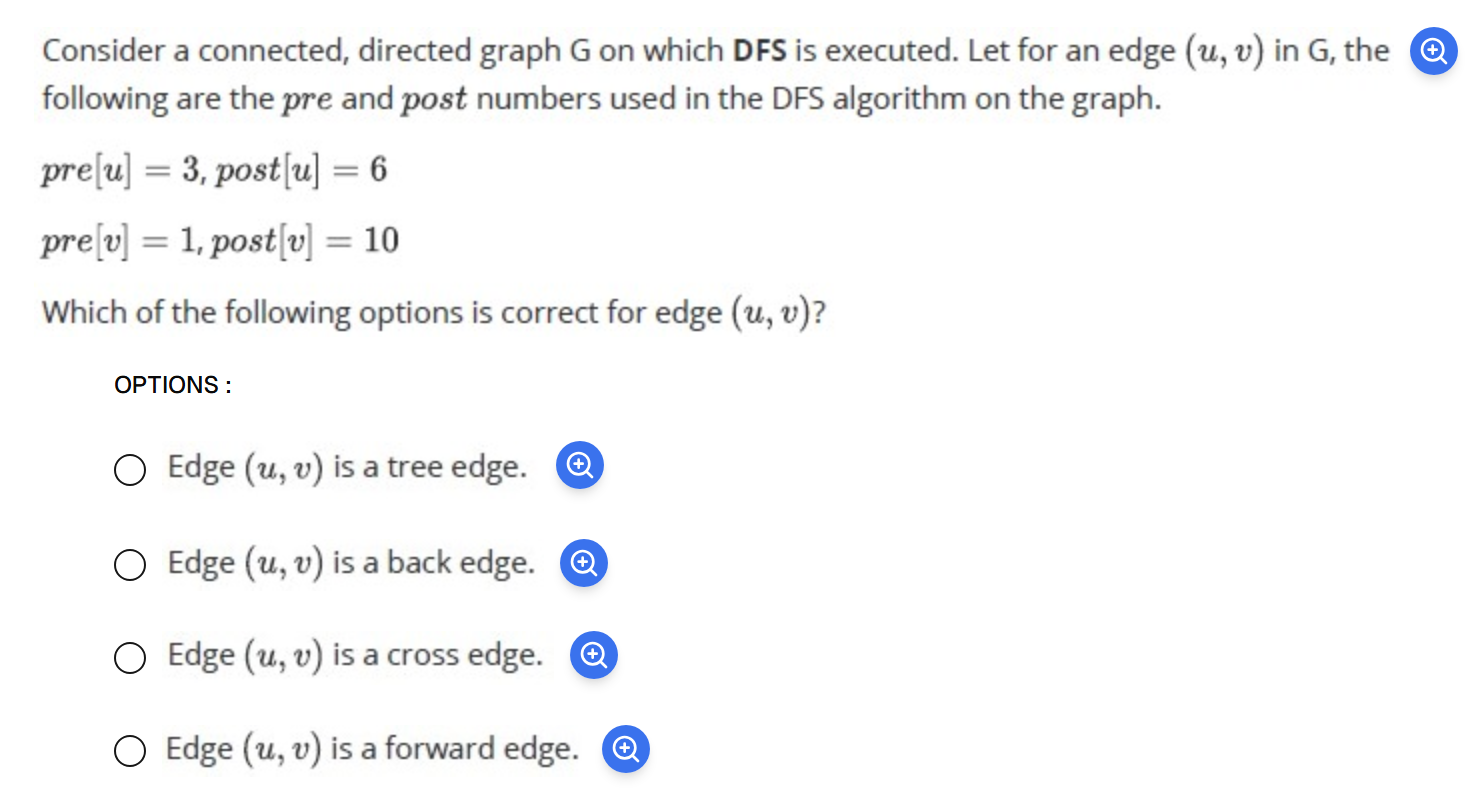

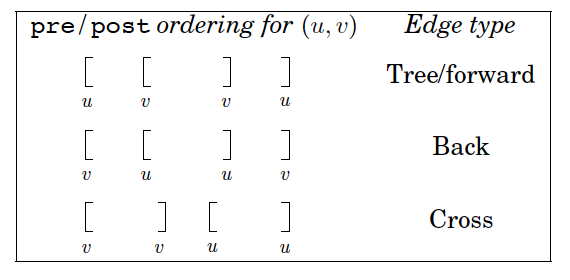

## Tree edge/forward edge:

- Edge (u, v) is tree/forward edge, if Interval `[pre(u), post(u)]` contains `[pre(v), post(v)]`
- `[pre(v), post(v)]` $\subseteq$ `[pre(u), post(u)]`
 

## Back edge:

- Edge (u, v) is back edge, if Interval `[pre(v), post(v)]` contains `[pre(u), post(u)]`
- Back edges generate cycles
- `[pre(u), post(u)]` $\subseteq$ `[pre(v), post(v)]`

## Cross edge:

- Edge (u, v) is cross edge, if Intervals `[pre(u), post(u)]` and `[pre(v), post(v)]` are disjoint

---
- $pre(u)$: time when DFS discovers $u$
- $post(u)$: time when DFS finishes $u$

The edge types are:


| Edge Type      | Mathematical Condition                                                                                  |
|----------------|--------------------------------------------------------------------------------------------------------|
| **Tree Edge**  | $pre(u) < pre(v) < post(v) < post(u)$ and $parent[v] = u$                                      |
| **Back Edge**  | $pre(v) < pre(u) < post(u) < post(v)$                                                              |
| **Forward Edge** | $pre(u) < pre(v) < post(v) < post(u)$ and $parent[v] \neq u$ (i.e., $v$ is a descendant of $u$ but not a direct child) |
| **Cross Edge** | $pre(v) < post(v) < pre(u) < post(u)$ (i.e., $u$ and $v$ are in different subtrees)            |


**Summary Table:**

| Edge Type      | Condition on pre/post times                                      |
|----------------|------------------------------------------------------------------|
| Tree/Forward   | $pre(u) < pre(v) < post(v) < post(u)$                        |
| Back           | $pre(v) < pre(u) < post(u) < post(v)$                        |
| Cross          | $pre(v) < post(v) < pre(u) < post(u)$                        |

- **Tree edge**: $parent[v] = u$ and above time condition
- **Forward edge**: $v$ is a descendant of $u$ but not a direct child
- **Back edge**: $v$ is an ancestor of $u$
- **Cross edge**: $u$ and $v$ are in different branches/subtrees[1][2][3]


# Vertex / Edge Notes

### **General Graph Formulas**

- **Graph Definition:**  
  A graph $G = (V, E)$ consists of a set of vertices $V$ and a set of edges $E$

### **Handshaking Lemma (Undirected Graphs)**

- **Sum of Degrees:**  
 $\sum_{v \in V} \deg(v) = 2|E|$
  (The sum of degrees of all vertices equals twice the number of edges)

### **Maximum and Minimum Edges Given Vertices**

| Graph Type                    | Number of Edges ($$m$$) Formula                            | Notes                           |
|-------------------------------|------------------------------------------------------------|---------------------------------|
| **Simple Undirected Graph**   | $0 \leq m \leq \frac{n(n-1)}{2}$                     | Maximum: complete graph  |
| **Simple Directed Graph**     | $0 \leq m \leq n(n-1)$                               | No self-loops                   |
| **Undirected Tree**           | $m = n - 1$                                          | Connected, acyclic              |
| **Undirected Cycle**          | $m = n$                                              | Each vertex degree 2            |
| **Minimum Edges (Connected)** | $m \geq n-1$                                         | For connected graphs            |

### **Maximum and Minimum Vertices Given Edges**

- **Given $m$ edges, maximum number of vertices in a simple graph:**
 $n \leq \frac{1 + \sqrt{1 + 8m}}{2}$
  (Solving $m = \frac{n(n-1)}{2}$ for $n$)

- **Given degree constraint ($\deg(v) \geq k$):**
 $2m \geq k n \implies n \leq \frac{2m}{k}$
  (From the handshaking lemma).

### **Other Useful Formulas**

- **Degree of a Vertex:**  
 $\deg(v) = \text{number of edges incident to } v$

- **Number of Odd Degree Vertices:**  
  Always even in any undirected graph

- **Edge Connectivity ($\lambda(G)$):**  
  Minimum number of edges whose removal disconnects the graph.

- **Vertex Connectivity ($K(G)$):**  
  Minimum number of vertices whose removal disconnects the graph.

### **Summary Table**

| Given         | Find           | Formula / Bound                                         |
|---------------|----------------|--------------------------------------------------------|
|$n$        | Max edges      |$\frac{n(n-1)}{2}$ (undirected), $n(n-1)$ (directed) |
|$m$        | Max vertices   |$n \leq \frac{1 + \sqrt{1 + 8m}}{2}$                |
|$n, k$     | Min edges      |$m \geq \frac{nk}{2}$ (if all degrees at least $k$)|
| Tree ($n$)  | Edges          |$m = n-1$                                           |

For an **undirected connected graph** with **46 edges**, the **minimum number of vertices** is **11**.

This is because the maximum number of edges in a simple undirected graph with $n$ vertices is $\frac{n(n-1)}{2}$.
Solving $\frac{n(n-1)}{2} \geq 46$ gives $n \geq 11$.

# Quick Sorting

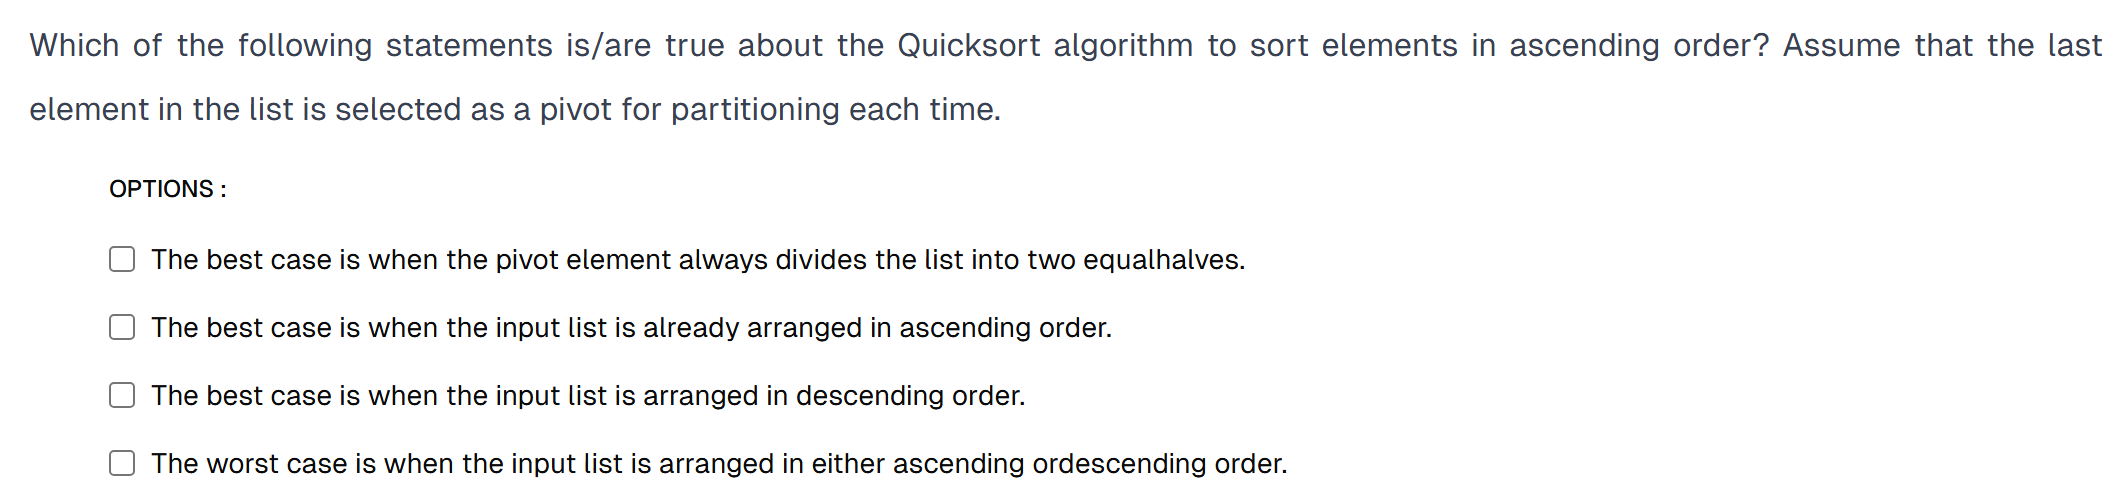


### 1. **The best case is when the pivot element always divides the list into two equal halves.**

**True.**  
- The best-case time complexity of Quicksort occurs when each pivot divides the array into two nearly equal halves at every step, leading to a recursion depth of $\log n$ and overall time complexity $O(n \log n)$[1][2][3].
- This is independent of the actual order of the input; it's about how the pivot partitions the array.

### 2. **The best case is when the input list is already arranged in ascending order.**

**False.**  
- When the last element is chosen as the pivot and the array is already sorted in ascending order, the pivot will always be the largest element.
- This results in highly unbalanced partitions: one subarray with $n-1$ elements and one with 0, leading to the **worst-case** time complexity $O(n^2)$[4][5].

### 3. **The best case is when the input list is arranged in descending order.**

**False.**  
- Similarly, with the last element as pivot, a descending order input will also cause unbalanced partitions (pivot is always the smallest), again resulting in the **worst-case** behavior[4][5].

### 4. **The worst case is when the input list is arranged in either ascending or descending order.**

**True.**  
- For both ascending and descending sorted input, choosing the last element as pivot leads to the most unbalanced partitioning at every step, resulting in the worst-case time complexity $O(n^2)$[4][5].

## **Summary Table**

| Option | Statement                                                                                      | Correct? | Explanation                                                                                  |
|--------|-----------------------------------------------------------------------------------------------|----------|----------------------------------------------------------------------------------------------|
| 1      | The best case is when the pivot element always divides the list into two equal halves.         | **Yes**  | This yields balanced recursion and $O(n \log n)$ time complexity.                          |
| 2      | The best case is when the input list is already arranged in ascending order.                   | **No**   | Causes worst-case behavior with last-element pivot.                                           |
| 3      | The best case is when the input list is arranged in descending order.                          | **No**   | Also causes worst-case behavior with last-element pivot.                                      |
| 4      | The worst case is when the input list is arranged in either ascending or descending order.     | **Yes**  | Both sorted and reverse-sorted inputs cause worst-case with last-element pivot.               |

**Correct options:**  
- **1** and **4** are true.  
- **2** and **3** are false.

[1] https://stackoverflow.com/questions/9141172/an-example-of-best-case-scenario-for-quick-sort-need-someone-to-check-if-my-ans
[2] https://ds1-iiith.vlabs.ac.in/exp/quick-sort/quick-sort/pivot-selection-and-array-partitioning.html
[3] https://www.reddit.com/r/learnprogramming/comments/pgplkk/when_it_comes_to_quicksort_which_pivot_style_has/
[4] https://stackoverflow.com/questions/4834740/what-is-the-worst-case-scenario-for-quicksort
[5] https://www.baeldung.com/cs/quicksort-time-complexity-worst-case
[6] https://pplx-res.cloudinary.com/image/private/user_uploads/69342964/efe4f3fb-721c-488f-a9be-01b8406c81ce/image.jpg
[7] https://takeuforward.org/data-structure/quick-sort-algorithm/
[8] https://www.ques10.com/p/65800/write-quicksort-algorithm-using-last-element-as-pi/
[9] https://www.w3schools.com/dsa/dsa_algo_quicksort.php
[10] https://builtin.com/articles/quicksort
[11] https://www.youtube.com/watch?v=Vtckgz38QHs

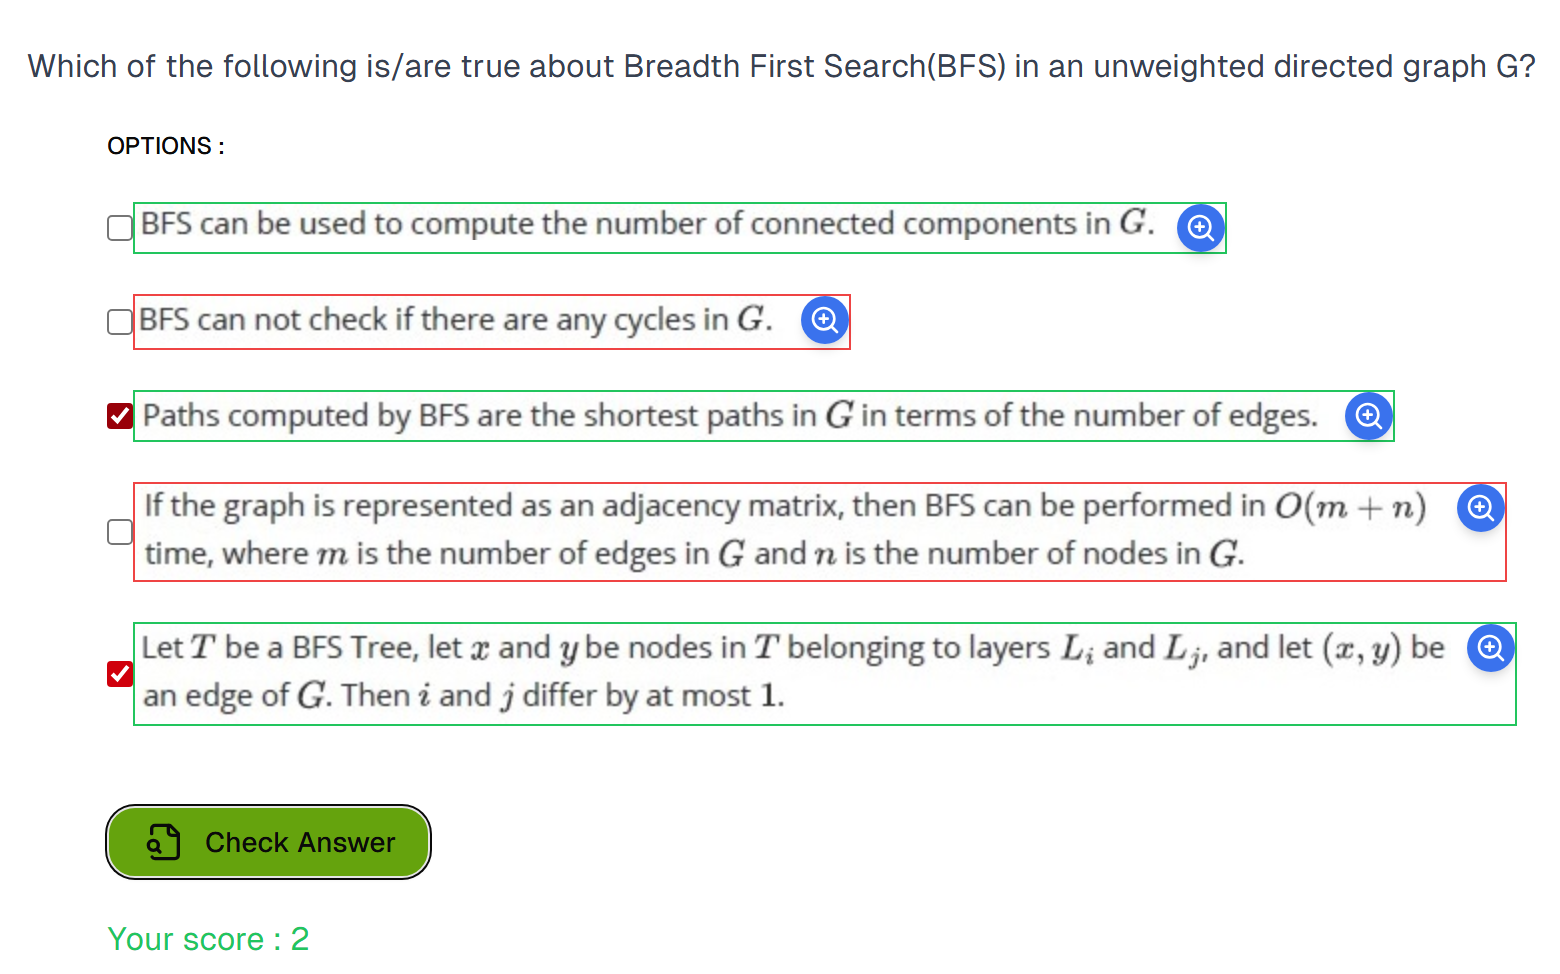

### 1. **BFS can be used to compute the number of connected components in G.**

- **Reasoning:**  
  In an **undirected graph**, BFS can be used to find connected components by running BFS from every unvisited node and counting the number of times you start a new BFS.  
  In a **directed graph**, the analogous concept is **strongly connected components**, and BFS alone cannot identify these; it only finds reachable nodes from a source.
- **Conclusion:**  
  **False for directed graphs**. BFS cannot compute the number of (strongly) connected components in a directed graph.

### 2. **BFS cannot check if there are any cycles in G.**

- **Reasoning:**  
  BFS **can** be used to detect cycles in a directed graph by checking for revisiting a node that is already in the BFS queue (not just visited).  
  So, the statement is incorrect.
- **Conclusion:**  
  **False**. BFS can be adapted to detect cycles in a directed graph.

### 3. **Paths computed by BFS are the shortest paths in G in terms of the number of edges.**

- **Reasoning:**  
  In any **unweighted graph** (directed or undirected), BFS always finds the shortest path from the source to all reachable nodes, in terms of the number of edges.
- **Conclusion:**  
  **True**.

### 4. **If the graph is represented as an adjacency matrix, then BFS can be performed in $O(m+n)$ time, where $m$ is the number of edges and $n$ is the number of nodes in G.**

- **Reasoning:**  
  BFS on an **adjacency list** is $O(m+n)$.  
  On an **adjacency matrix**, for each node, you must scan all $n$ possible neighbors, so the total time is $O(n^2)$.  
  The statement is **false** for adjacency matrix representation.
- **Conclusion:**  
  **False**.

### 5. **Let $T$ be a BFS Tree, let $x$ and $y$ be nodes in $T$ belonging to layers $L_i$ and $L_j$, and let $(x, y)$ be an edge of $G$. Then $i$ and $j$ differ by at most 1.**

- **Reasoning:**  
  In BFS, every edge in the graph connects either nodes in the same layer or nodes in consecutive layers (i.e., the difference in layer numbers is at most 1).  
  In a directed graph, an edge can go from layer $i$ to $i$, $i+1$, or $i-1$, but not skip layers.
- **Conclusion:**  
  **True**.

## **Summary Table**

| Statement                                                                                                         | True/False | Reason                                                                                      |
|-------------------------------------------------------------------------------------------------------------------|------------|---------------------------------------------------------------------------------------------|
| BFS can be used to compute the number of connected components in G.                                               | **False**  | Only true for undirected graphs, not for directed graphs.                                   |
| BFS cannot check if there are any cycles in G.                                                                    | **False**  | BFS can be adapted to detect cycles in directed graphs.                                     |
| Paths computed by BFS are the shortest paths in G in terms of the number of edges.                                | **True**   | BFS finds shortest paths in unweighted graphs.                                              |
| If the graph is represented as an adjacency matrix, then BFS can be performed in $O(m+n)$ time.                 | **False**  | BFS is $O(n^2)$ with adjacency matrix, not $O(m+n)$.                                   |
| If $(x, y)$ is an edge and $x$ is in layer $L_i$, $y$ is in layer $L_j$, then $|i-j| \leq 1$.         | **True**   | BFS tree property: edges connect nodes in same or consecutive layers.                       |

**Correct statements:**  
- **Paths computed by BFS are the shortest paths in G in terms of the number of edges.**
- **Let $T$ be a BFS Tree, ... $i$ and $j$ differ by at most 1.**